<a href="https://colab.research.google.com/github/AndresChapo/AI-Bitcoin-price-predictor/blob/main/Plot_and_train_LSTM_DL_with_5m_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests, json
import datetime, time
import os
import csv, io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
#import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import tensorflow as tf
print(tf.__version__)


2.4.1


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')  

Mounted at /content/drive


In [ ]:
tiempo = []
valor = []
count = 0
with io.open('/content/drive/MyDrive/Colab Notebooks/ETH-precio_historico_5m_last_365_days.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)

    for row in csv_reader:
        tiempo.append(datetime.datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S+00:00'))
        valor.append(float(row[1])/10000)
        print(tiempo[count],valor[count])
        count += 1
        
series = np.array(valor)
tiempo = np.array(tiempo)
print(len(tiempo))
print(len(valor))

Se han truncado las últimas 5000 líneas del flujo de salida.
2021-02-10 16:35:00 0.173238
2021-02-10 16:40:00 0.173126
2021-02-10 16:45:00 0.17305
2021-02-10 16:50:00 0.172716
2021-02-10 16:55:00 0.172819
2021-02-10 17:00:00 0.17285799999999998
2021-02-10 17:05:00 0.171809
2021-02-10 17:10:00 0.172587
2021-02-10 17:15:00 0.172486
2021-02-10 17:20:00 0.17227699999999999
2021-02-10 17:25:00 0.172428
2021-02-10 17:30:00 0.173511
2021-02-10 17:35:00 0.17411300000000002
2021-02-10 17:40:00 0.17445
2021-02-10 17:45:00 0.174649
2021-02-10 17:50:00 0.174043
2021-02-10 17:55:00 0.174381
2021-02-10 18:00:00 0.174036
2021-02-10 18:05:00 0.174244
2021-02-10 18:10:00 0.174028
2021-02-10 18:15:00 0.173629
2021-02-10 18:20:00 0.173926
2021-02-10 18:25:00 0.174696
2021-02-10 18:30:00 0.173823
2021-02-10 18:35:00 0.173301
2021-02-10 18:40:00 0.173261
2021-02-10 18:45:00 0.17313199999999998
2021-02-10 18:50:00 0.173599
2021-02-10 18:55:00 0.173748
2021-02-10 19:00:00 0.174374
2021-02-10 19:05:00 0.17440

AttributeError: ignored

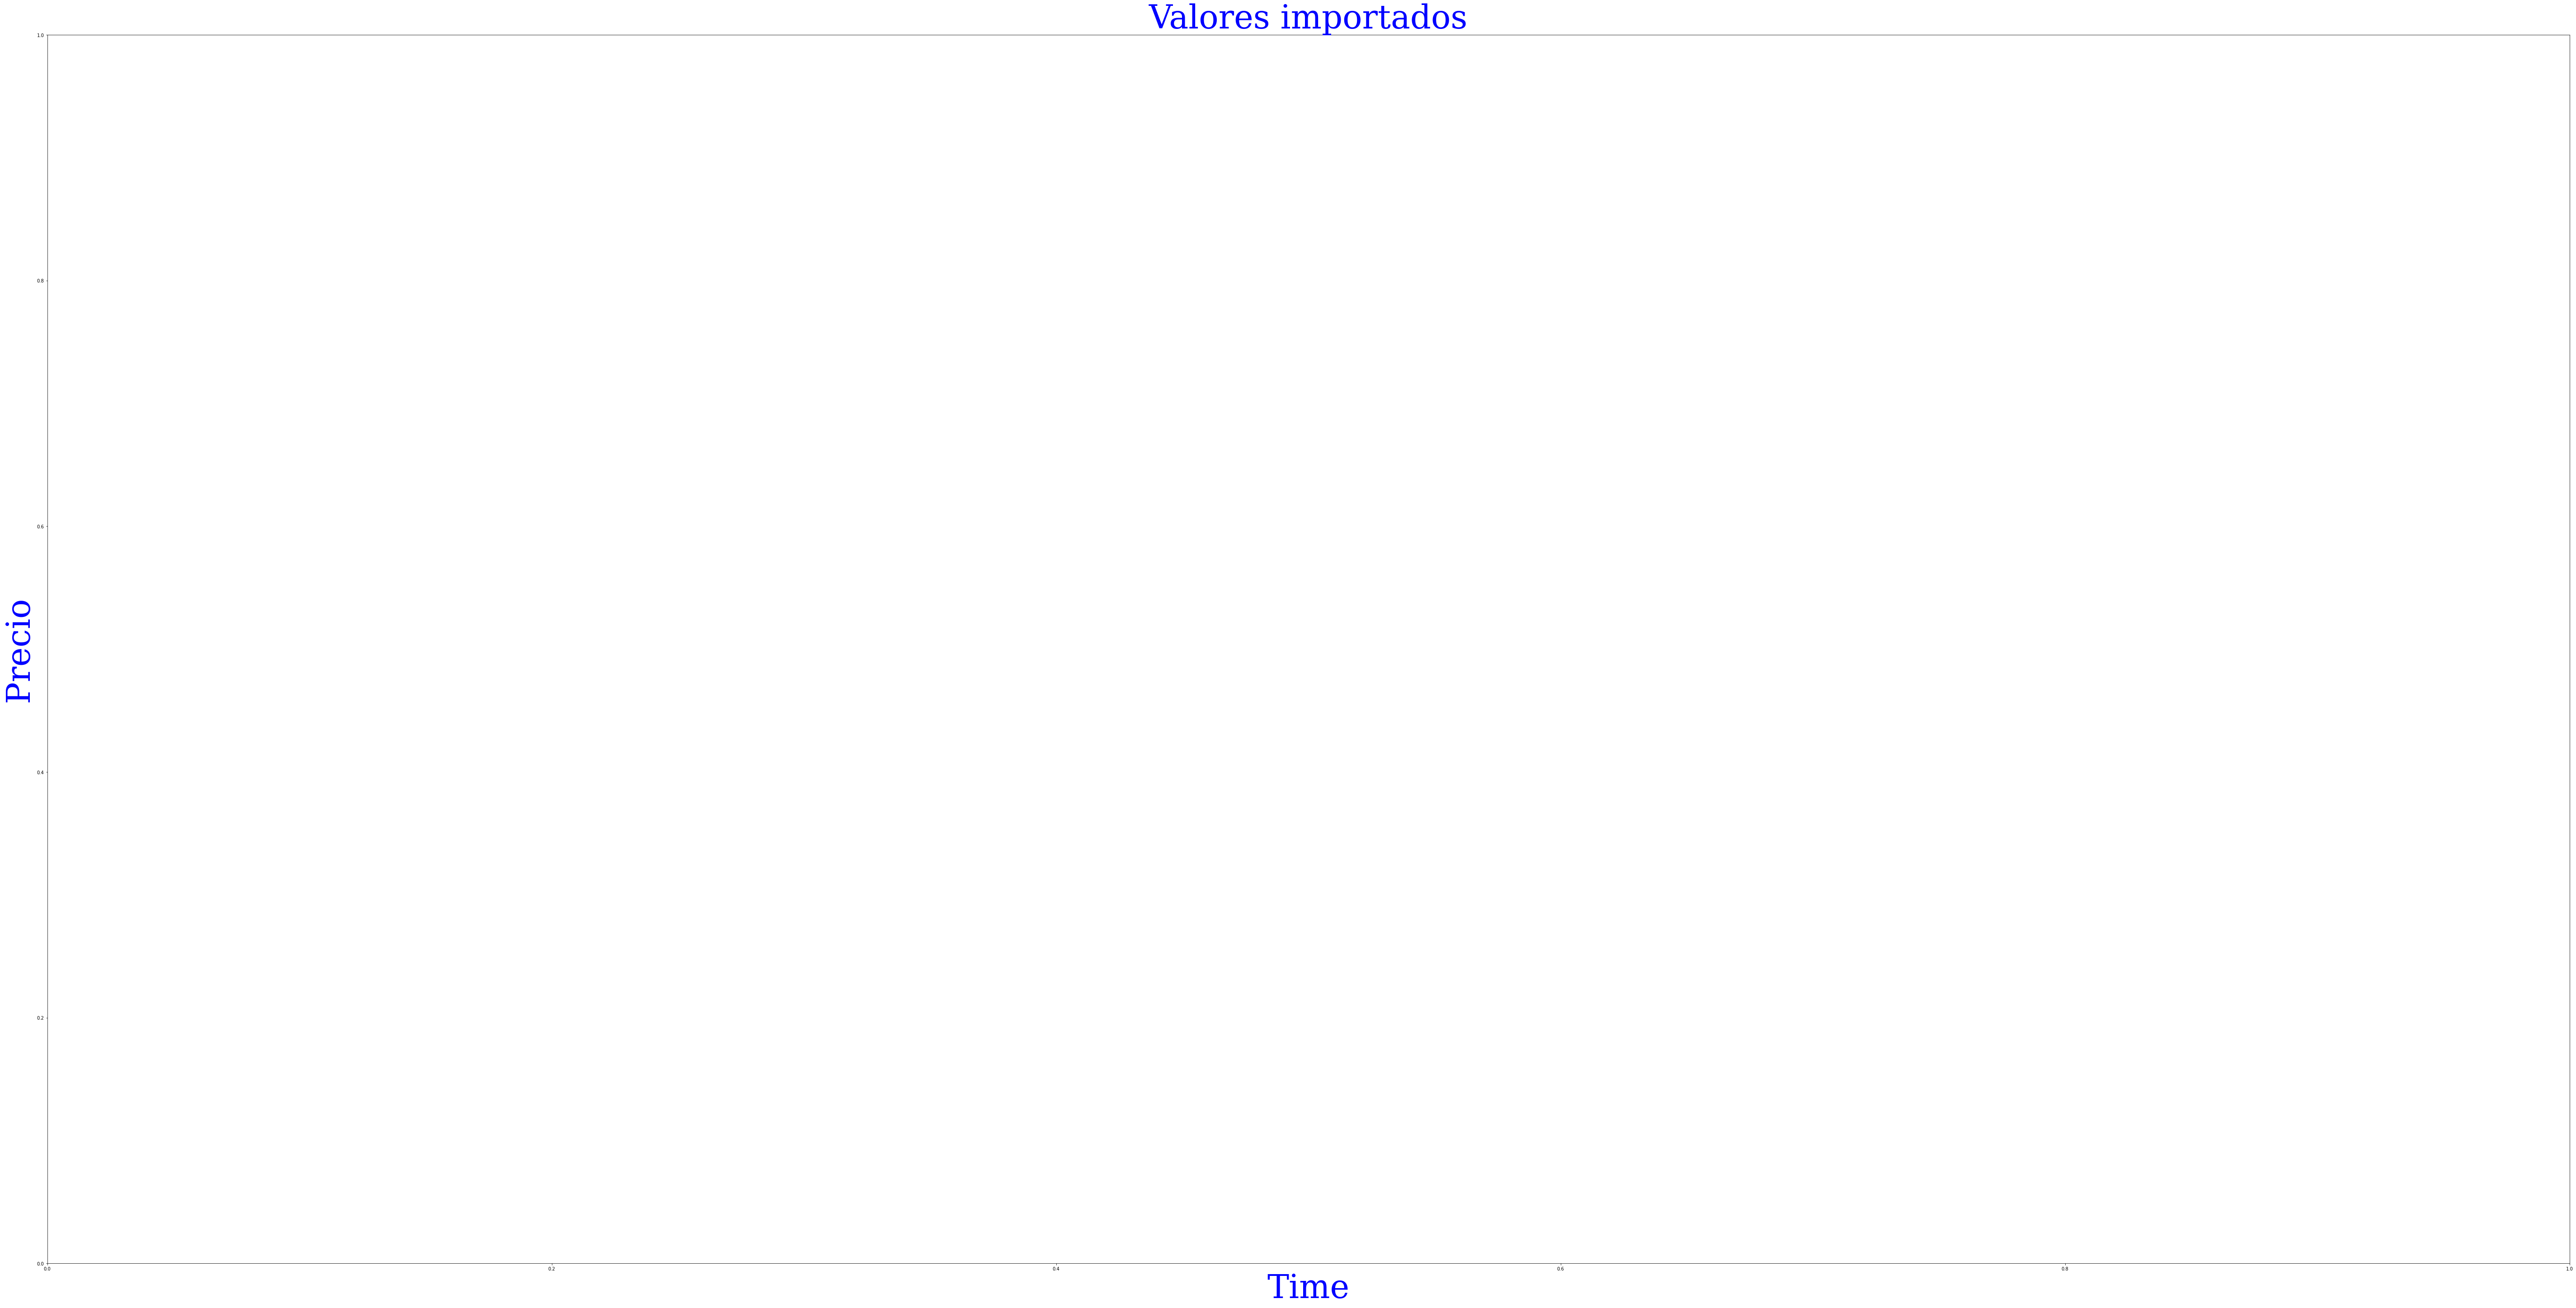

In [ ]:
# ESTE ES DE PRUEBA... NO CORRER
# IT'S JUST A EXPERIMENT... DO NOT RUN

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 72,
        }
plt.figure(1 , figsize=(100,50)) #with and high
#xbt_price_5m_lastWeek = fig_1.add_subplot(151,autoscale_on=1)
plt.title('Valores importados', fontdict=font)
plt.xlabel('Time', fontdict=font)
plt.ylabel('Precio', fontdict=font)
plt.style.use(['dark_background'])
plt.axes.set_major_locator(MaxNLocator(integer=True))
#position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
plt.plot(tiempo[0:], series[0:],'b-', linewidth=10, markersize=10)
#plt.yaxis.set_major_locator(MaxNLocator(integer=True))
#plt.autofmt_xdate()

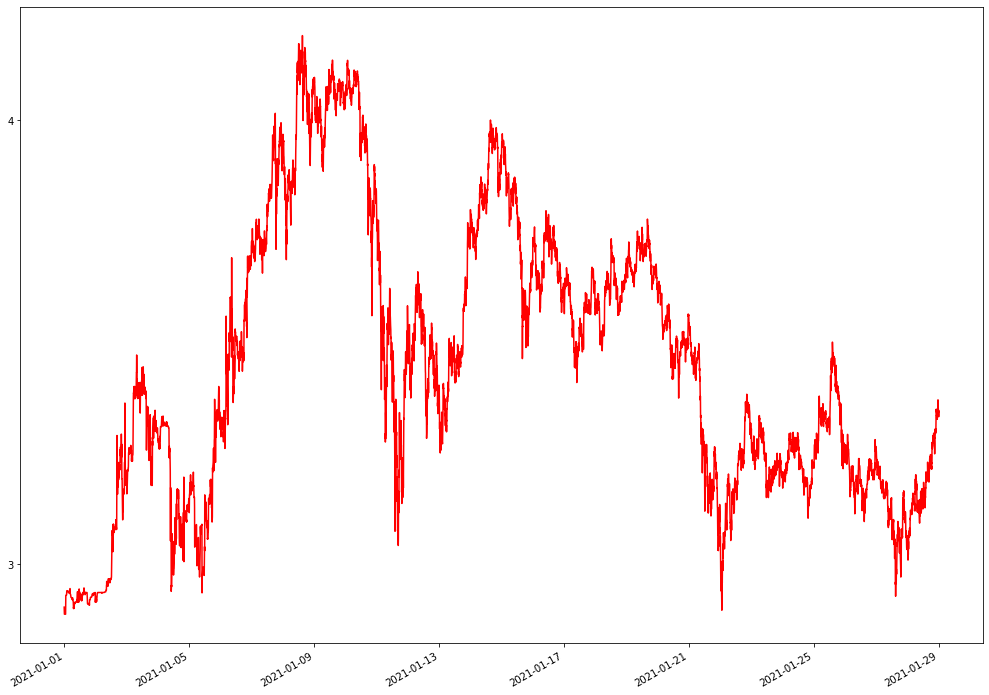

In [ ]:
fig_1 = plt.figure(1, figsize=(100,13)) #with and high
xbt_price_5m_lastWeek = fig_1.add_subplot(151,autoscale_on=1)

plt.style.use(['dark_background'])

xbt_price_5m_lastWeek.plot(tiempo[0:], series[0:],'r-')
xbt_price_5m_lastWeek.yaxis.set_major_locator(MaxNLocator(integer=True))
fig_1.autofmt_xdate()



In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

def plot_series(tempo, series, format="-", start=0, end=None):
    plt.plot(tempo[start:end], series[start:end], format)
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.grid(True)

In [ ]:
# ESTE ES DE PRUEBA... NO CORRER
# IT'S JUST A EXPERIMENT... DO NOT RUN
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda x: x/10000)
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

SyntaxError: ignored

In [ ]:
# Cantidad de datos que usara para entrenar
# Here you define the amount of data it'll use to train
split_time = 100000
time_train = tiempo[:split_time]
x_train = series[:split_time]
time_valid = tiempo[split_time:]
x_valid = series[split_time:]

window_size = 48
batch_size = 48
shuffle_buffer_size = 500

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

#dataset = tf.data.Dataset.from_tensor_slices(series)
#dataset = dataset.map(lambda x: x/100000)
list(dataset.as_numpy_iterator())

[(array([[0.023197, 0.023161, 0.023128, ..., 0.022601, 0.022584, 0.022594],
         [0.022086, 0.022125, 0.022122, ..., 0.022036, 0.02198 , 0.022086],
         [0.022924, 0.022876, 0.022846, ..., 0.022449, 0.022457, 0.022494],
         ...,
         [0.022382, 0.022346, 0.022377, ..., 0.022212, 0.022229, 0.022107],
         [0.022516, 0.022432, 0.022425, ..., 0.022286, 0.022248, 0.0223  ],
         [0.022036, 0.02198 , 0.022086, ..., 0.021363, 0.021363, 0.021329]]),
  array([0.022646, 0.022072, 0.022558, 0.022143, 0.022409, 0.022286,
         0.021521, 0.021572, 0.022362, 0.023161, 0.021964, 0.021467,
         0.021329, 0.022497, 0.021644, 0.02163 , 0.021572, 0.022406,
         0.021514, 0.021696, 0.021981, 0.022159, 0.021827, 0.022958,
         0.022289, 0.0223  , 0.022532, 0.022037, 0.02191 , 0.022264,
         0.022018, 0.022518, 0.022212, 0.022538, 0.022045, 0.022642,
         0.022457, 0.022038, 0.022272, 0.022429, 0.022601, 0.023246,
         0.022594, 0.022336, 0.022472, 0.0220

In [ ]:
# CARPETA DONDE GUARDARA EL MODELO ENTRENADO (CHECKPOINT)
# It says where it will save the trained model
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/checkpoints_BTC_5m/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpint callback
guardar_cada = 146 * 100
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, save_freq=guardar_cada)


In [ ]:
### ESTE NO VA
# IT'S JUST A EXPERIMENT... DO NOT RUN (bad model)
tf.keras.backend.clear_session()

epocas = 3
model38 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.LSTM(24, return_sequences=True),
    tf.keras.layers.LSTM(24, return_sequences=True),
    tf.keras.layers.Dense(12, activation="relu"), 
    tf.keras.layers.Dense(6, activation="softmax"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)

model38.compile(loss="mse", optimizer=optimizer)
history = model38.fit(dataset, epochs=epocas, callbacks=[lr_schedule], verbose=2)

Epoch 1/3
146/146 - 10s - loss: 12.0665
Epoch 2/3
146/146 - 1s - loss: 11.9555
Epoch 3/3
146/146 - 1s - loss: 11.8323


In [ ]:
# NO MODIFICAR ESTE MODELO
# DON'T CHANGE THIS MODEL (IT WORKS WELL)
# MAE: 0.013122932
# LLAMAR CON EPOCAS = 500
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                        input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(48, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(48)),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 100.0)
  ])

  model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 96)          19200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 96)                55680     
_________________________________________________________________
dense (Dense)                (None, 1)                 97        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 74,977
Trainable params: 74,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ENTRENA EL MODELO (2000 epocas = 1hr)
# It trains the model

epocas = 840
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

inicio = time.time()
history = model.fit(dataset,epochs=epocas,callbacks=[cp_callback],verbose=1)
fin = time.time()
print("Tiempo de ejecucion: ",(fin-inicio))

# GUARDA EL MODELO YA ENTRENADO
# SAVE THE TRAINED MODEL
model.save('/content/drive/MyDrive/Colab Notebooks/checkpoints_BTC_5m/ETH-modelo_entrenado_840epocs_windowsize48x48_1year-dataset.h5')

Epoch 1/840
2083/2083 [==============================] - 35s 12ms/step - loss: 0.0011 - mae: 0.0151
Epoch 2/840
2083/2083 [==============================] - 25s 12ms/step - loss: 0.0258 - mae: 0.0475
Epoch 3/840
2083/2083 [==============================] - 25s 12ms/step - loss: 0.0187 - mae: 0.0406
Epoch 4/840
2083/2083 [==============================] - 25s 12ms/step - loss: 0.0131 - mae: 0.0340
Epoch 5/840
2083/2083 [==============================] - 25s 12ms/step - loss: 0.0095 - mae: 0.0292
Epoch 6/840
2083/2083 [==============================] - 25s 12ms/step - loss: 0.0070 - mae: 0.0251
Epoch 7/840
2083/2083 [==============================] - 25s 12ms/step - loss: 0.0052 - mae: 0.0216
Epoch 8/840
  16/2083 [..............................] - ETA: 24s - loss: 0.0923 - mae: 0.2718
Epoch 00008: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints_BTC_5m/cp.ckpt
2083/2083 [==============================] - 26s 12ms/step - loss: 0.0035 - mae: 0.0182
Epoch 9/840
2083/2083 

In [ ]:
# GUARDA EL MODELO YA ENTRENADO
# SAVE THE TRAINED MODEL
model.save('/content/drive/MyDrive/Colab Notebooks/checkpoints_BTC_5m/modelo_entrenado_8000epocs.h5')

In [ ]:
# GUARDA SOLAMENTE LOS WEIGHTS
# SAVE JUST THE WEIGHTS
model.save_weights(checkpoint_dir)

In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/checkpoints_BTC_5m'

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index	modelo_entrenado.h5


In [ ]:
# CREA UN MODELO Y LE PONE LOS WEIGHTS ENTREANDOS
# It creates a new model and set it with the trained weights
model = create_model()
model.load_weights(checkpoint_path)

In [ ]:
# TRAE UN MODELO YA ENTRENADO
# Fetch a trained model

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/checkpoints_BTC_5m/modelo_entrenado.h5')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 48)          4992      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 48)                14016     
_________________________________________________________________
dense (Dense)                (None, 1)                 49        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 19,057
Trainable params: 19,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lrs = np.array(1e-8 * (10 ** (np.arange(epocas) / 20)))
loss_history = np.array(history.history["loss"])
for i in range(len(loss_history)):
  loss_history[i] = loss_history[i]

plt.semilogx(lrs, loss_history)
plt.axis([1e-8, 1e-3, 0, 100])

NameError: ignored

In [ ]:
# It makes a graph

forecast = []
for tempo in range(len(series) - window_size):
  forecast.append(model.predict(series[tempo:tempo + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(100, 13))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

KeyboardInterrupt: ignored

In [ ]:
# Print the MAE Mean Absolute Error
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()
# MAE DE 500 epocs: 0.013122932
# MAE DE 5   epocs: 0.024272988

0.024272988

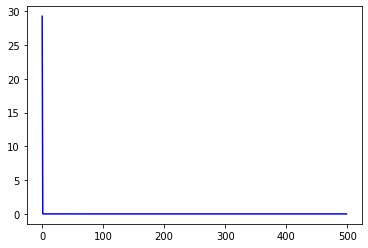

In [ ]:
# It shows the evolution of 'loss'
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

[0.001975808758288622, 0.0020312597043812275, 0.0018729912117123604, 0.0018773524789139628, 0.0018881310243159533, 0.0018852801294997334, 0.0020701256580650806, 0.0019430887186899781, 0.001837455783970654, 0.0018557036528363824, 0.0018928057979792356, 0.0017978703835979104, 0.0017705070786178112, 0.0018134934362024069, 0.0017391897272318602, 0.001778785022906959, 0.0018582846969366074, 0.0017267282819375396, 0.0016826665960252285, 0.001705846400000155, 0.001720900065265596, 0.0017098556272685528, 0.0016621288377791643, 0.0017146923346444964, 0.0016097535844892263, 0.0017011190066114068, 0.0016982019878923893, 0.001653845887631178, 0.0016461788909509778, 0.0016698249382898211, 0.0017258236184716225, 0.0016021189512684941, 0.0016881879419088364, 0.001602274482138455, 0.0015471320366486907, 0.0015713573666289449, 0.0016153844771906734, 0.0015781851252540946, 0.0016123492969200015, 0.001501609105616808, 0.0015330376336351037, 0.0015197278698906302, 0.0015207018004730344, 0.0014532122295349

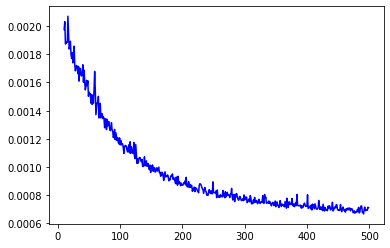

In [ ]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()